In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from umap import UMAP

In [ ]:
#viewing the dataset from my github repository
url="/content/heart_attack_russia_youth_vs_adult.csv"
df=pd.read_csv(url)
df.head()

ID  Age  Gender Region  Blood_Pressure  Cholesterol   BMI  Heart_Rate  \
0   1   50    Male  Rural           110.0        196.5  15.9          76   
1   2   40  Female  Urban           138.8        157.5  27.1          82   
2   3   26    Male  Rural           116.0        210.1  27.2          71   
3   4   54  Female  Rural           133.5        170.5  26.0          74   
4   5   19  Female  Urban           108.0        224.5  27.5          67   

  Exercise_Level  Smoking  ... Income_Level  Physical_Activity  \
0           High    False  ...          Low                Low   
1       Moderate    False  ...          Low           Moderate   
2       Moderate    False  ...       Middle               High   
3       Moderate     True  ...       Middle           Moderate   
4            Low    False  ...       Middle                Low   

   Education_Level  Marital_Status  Urban_Rural  Medication  Health_Awareness  \
0          Primary         Married        Rural       False                 5   
1           Higher         Married        Urban       False                 1   
2          Primary         Married        Urban       False                 4   
3           Higher         Married        Urban       False                 2   
4           Higher         Widowed        Urban       False                 4   

  Daily_Water_Intake  Mental_Health Obesity  
0                2.3              5   False  
1                5.0              4   False  
2                2.4              8   False  
3                2.7              6    True  
4                3.5              4    True  

[5 rows x 30 columns]

In [ ]:
df.describe()

ID           Age  Blood_Pressure   Cholesterol           BMI  \
count  50000.000000  50000.000000    50000.000000  50000.000000  50000.000000   
mean   25000.500000     35.991820      120.058636    199.852762     24.983912   
std    14433.901067     14.110139       14.975835     49.998331      5.003784   
min        1.000000     12.000000       60.000000    -18.700000      2.900000   
25%    12500.750000     24.000000      109.900000    166.100000     21.600000   
50%    25000.500000     36.000000      120.050000    199.900000     25.000000   
75%    37500.250000     48.000000      130.200000    233.500000     28.400000   
max    50000.000000     60.000000      188.400000    398.800000     46.100000   

         Heart_Rate  Stress_Level   Sleep_Hours  Health_Awareness  \
count  50000.000000  50000.000000  50000.000000      50000.000000   
mean      79.988980      5.503700      7.011464          3.007100   
std       11.804567      2.870741      1.740651          1.410351   
min       60.000000      1.000000      4.000000          1.000000   
25%       70.000000      3.000000      5.500000          2.000000   
50%       80.000000      6.000000      7.000000          3.000000   
75%       90.000000      8.000000      8.500000          4.000000   
max      100.000000     10.000000     10.000000          5.000000   

       Daily_Water_Intake  Mental_Health  
count        50000.000000    50000.00000  
mean             2.997782        5.48674  
std              1.149608        2.86076  
min              1.000000        1.00000  
25%              2.000000        3.00000  
50%              3.000000        5.00000  
75%              4.000000        8.00000  
max              5.000000       10.00000

In [ ]:
df_new = df.copy()
print("Initial null value counts:\n", df_new.isnull().sum())

for col in df_new.select_dtypes(include=['float']).columns:
    positive_values = df_new[col][df_new[col] > 0]
    if not positive_values.empty:
        mean_value = positive_values.mean()
        df_new[col] = df_new[col].apply(lambda x: mean_value if x <= 0 or pd.isnull(x) else x)

for column in df_new.select_dtypes(exclude='number').columns:
    df_new[column] = df_new[column].astype(str)

df_new = df_new.loc[:, ~df_new.columns.str.contains('^Unnamed')]
df_new = df_new.dropna()

print("\nFinal null value counts:\n", df_new.isnull().sum())

print("\nFinal DataFrame shape:", df_new.shape)

Initial null value counts:
 ID                           0
Age                          0
Gender                       0
Region                       0
Blood_Pressure               0
Cholesterol                  0
BMI                          0
Heart_Rate                   0
Exercise_Level               0
Smoking                      0
Alcohol_Consumption      25024
Diabetes                     0
Family_History               0
Stress_Level                 0
Heart_Attack                 0
Angina                       0
Heart_Disease_History        0
Diet                         0
Sleep_Hours                  0
Occupation                   0
Income_Level                 0
Physical_Activity            0
Education_Level              0
Marital_Status               0
Urban_Rural                  0
Medication                   0
Health_Awareness             0
Daily_Water_Intake           0
Mental_Health                0
Obesity                      0
dtype: int64

Final null value counts:
 ID

Histogram


C:\Users\law_b\AppData\Local\Temp\ipykernel_21716\1036788686.py:17: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



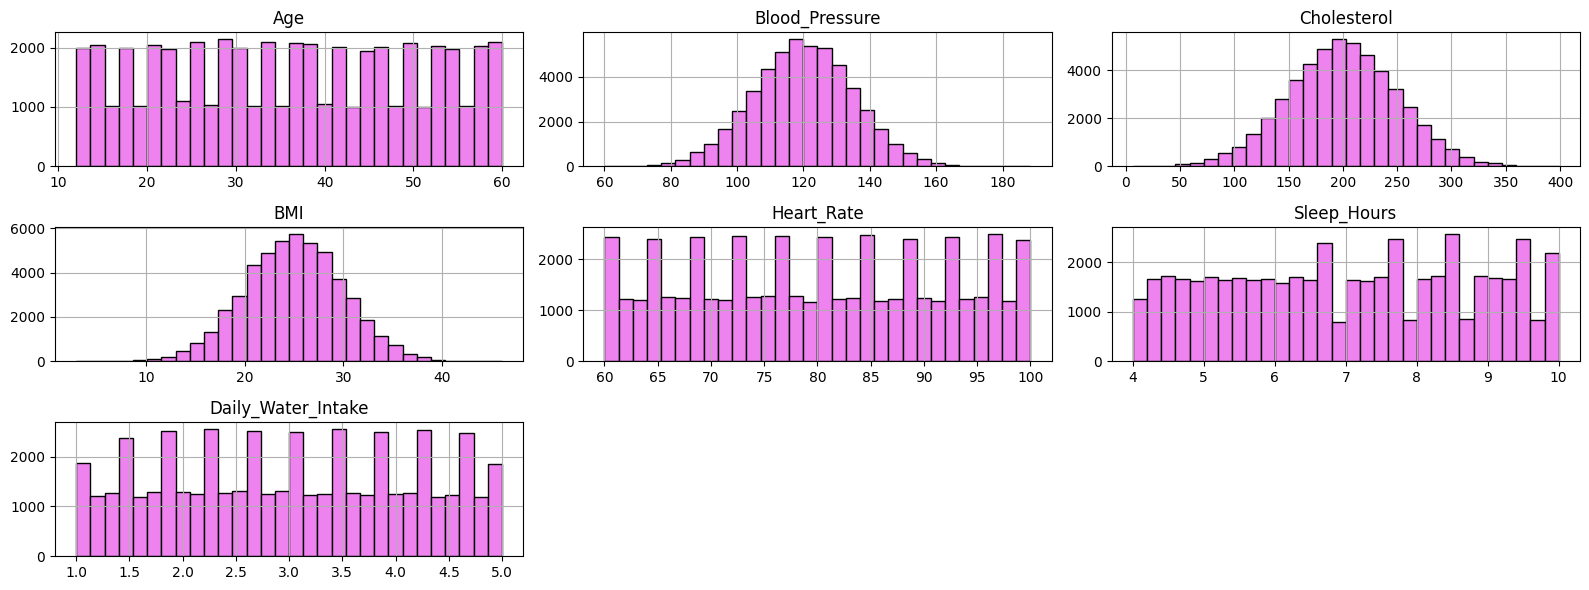

In [ ]:
# Histogram
print("Histogram")

# List of numeric columns for histograms
numeric_columns = [['Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Heart_Rate', 'Sleep_Hours', 'Daily_Water_Intake']]

# Determine the number of rows and columns for subplots
n_cols = 2
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Plot histograms for each numeric column as subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 6 * n_rows))
#axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    df_new[col].hist(ax=ax, bins=30, color='violet', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

                         Age  Blood_Pressure  Cholesterol       BMI  \
Age                 1.000000       -0.000037    -0.005028  0.002640   
Blood_Pressure     -0.000037        1.000000     0.001426 -0.004789   
Cholesterol        -0.005028        0.001426     1.000000  0.007163   
BMI                 0.002640       -0.004789     0.007163  1.000000   
Heart_Rate         -0.003697       -0.012488     0.002043 -0.009491   
Stress_Level        0.009260       -0.000293     0.003322  0.003273   
Sleep_Hours        -0.009355       -0.001150    -0.008843  0.003105   
Daily_Water_Intake  0.001802       -0.001918    -0.000098 -0.001232   
Mental_Health      -0.000388        0.003967     0.001024  0.000980   

                    Heart_Rate  Stress_Level  Sleep_Hours  Daily_Water_Intake  \
Age                  -0.003697      0.009260    -0.009355            0.001802   
Blood_Pressure       -0.012488     -0.000293    -0.001150           -0.001918   
Cholesterol           0.002043      0.003322  

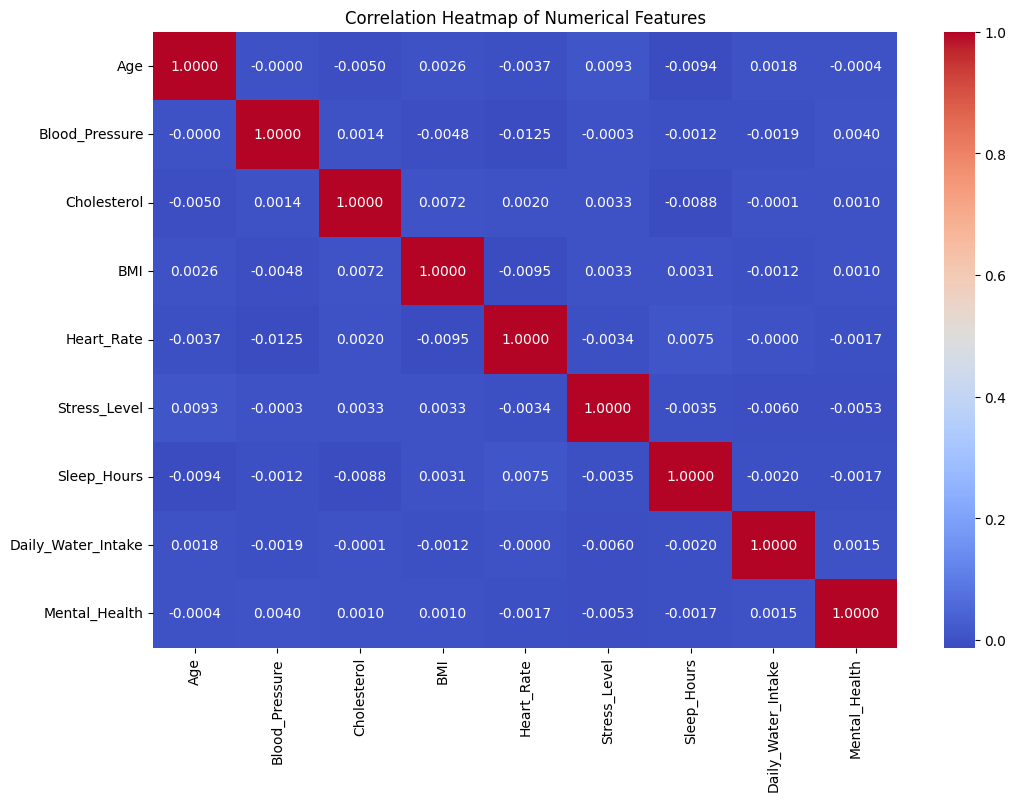

In [ ]:
# Heatmap - Correlation heatmap for numerical columns
numerical_columns = [
    'Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Heart_Rate',
    'Stress_Level', 'Sleep_Hours', 'Daily_Water_Intake', 'Mental_Health'
]
plt.figure(figsize=(12, 8))
corr_matrix = df_new[numerical_columns].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

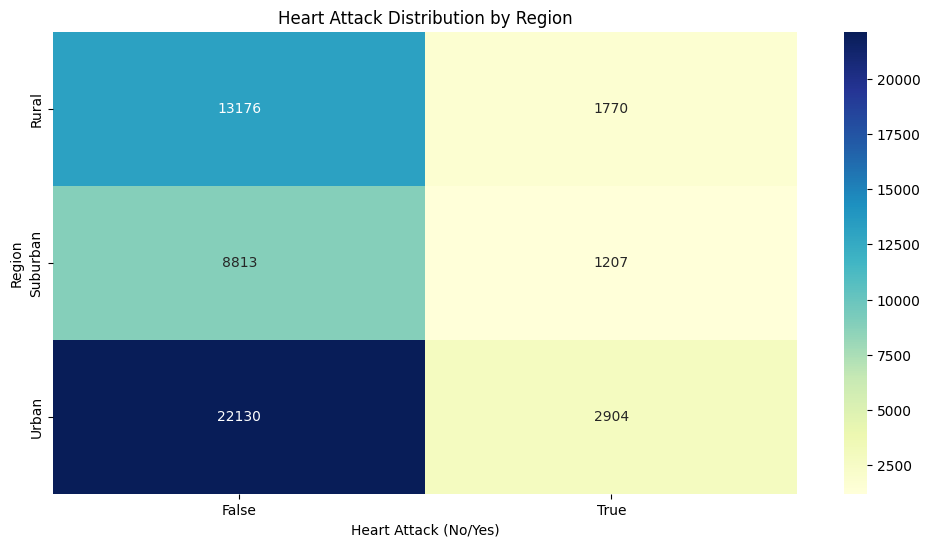

In [ ]:
# Categorical heatmap Crosstab - Heart Attack vs Region
plt.figure(figsize=(12, 6))
region_counts = pd.crosstab(df_new['Region'], df_new['Heart_Attack'])
sns.heatmap(region_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heart Attack Distribution by Region')
plt.xlabel('Heart Attack (No/Yes)')
plt.ylabel('Region')
plt.show()

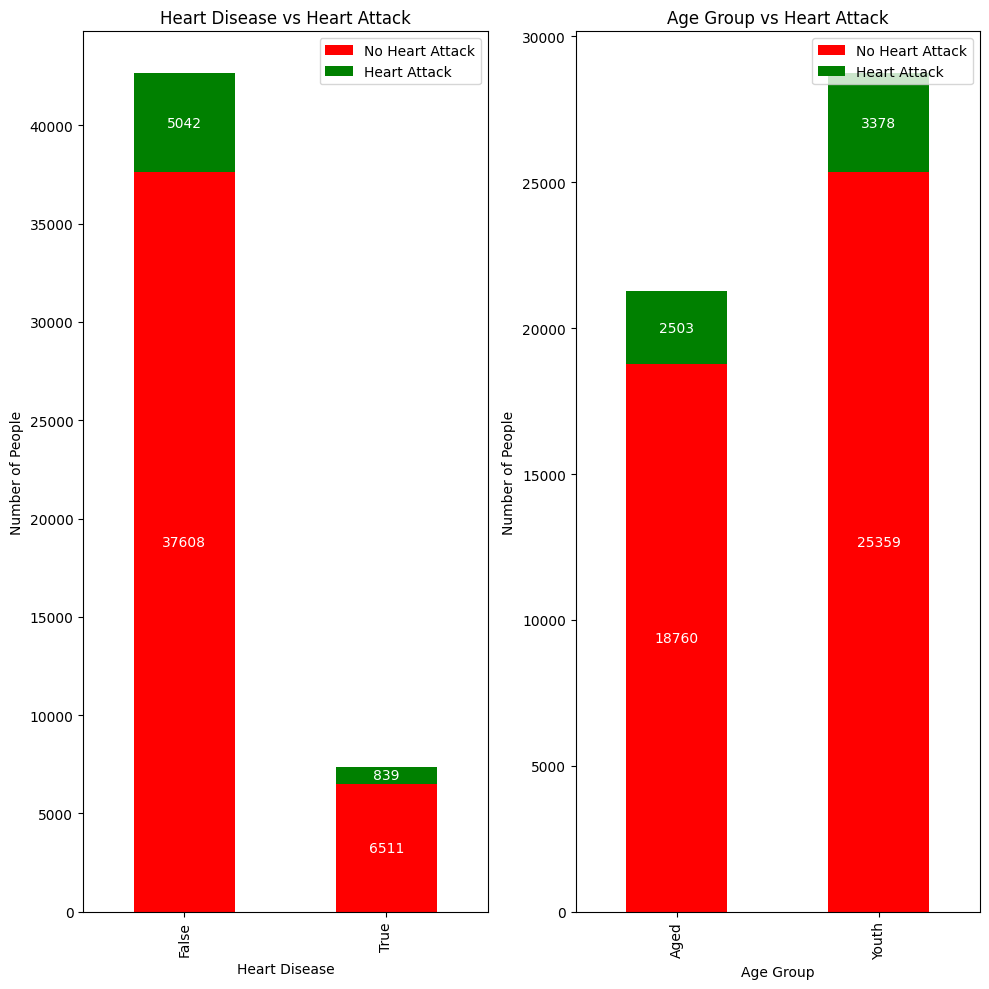

In [ ]:
#Bar stack plot

# Count occurrences of Heart Attack and Heart Disease (assuming binary values for both)
heart_disease_attack_counts = df_new.groupby(["Heart_Disease_History", "Heart_Attack"]).size().unstack(fill_value=0)

# Count occurrences of Heart Attack and Age Group (Youth vs. Aged)
df_new["Age_Group"] = df_new["Age"].apply(lambda x: "Youth" if x < 40 else "Aged")
age_group_attack_counts = df_new.groupby(["Age_Group", "Heart_Attack"]).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Plot for Heart Disease vs Heart Attack
heart_disease_attack_counts.plot(kind="bar", stacked=True, ax=axes[0], color=["red", "green"])
axes[0].set_title("Heart Disease vs Heart Attack")
axes[0].set_xlabel("Heart Disease")
axes[0].set_ylabel("Number of People")
axes[0].legend(["No Heart Attack", "Heart Attack"], loc="upper right")

# Add counts on top of the bars for Heart Disease vs Heart Attack
for p in axes[0].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    axes[0].annotate(f'{int(height)}', (x, y), ha='center', va='center', color='white', fontsize=10)

# Plot for Age Group vs Heart Attack
age_group_attack_counts.plot(kind="bar", stacked=True, ax=axes[1], color=["red", "green"])
axes[1].set_title("Age Group vs Heart Attack")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Number of People")
axes[1].legend(["No Heart Attack", "Heart Attack"], loc="upper right")

# Add counts on top of the bars for Age Group vs Heart Attack
for p in axes[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    axes[1].annotate(f'{int(height)}', (x, y), ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

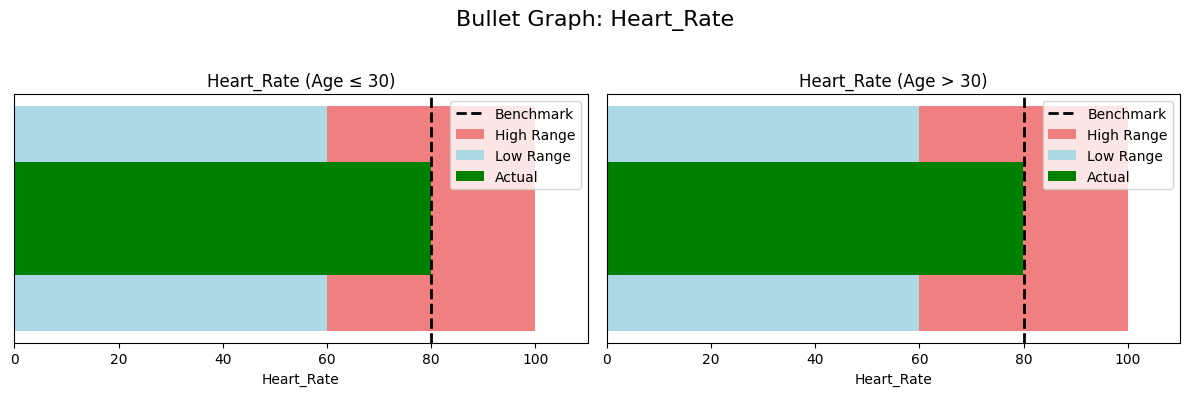

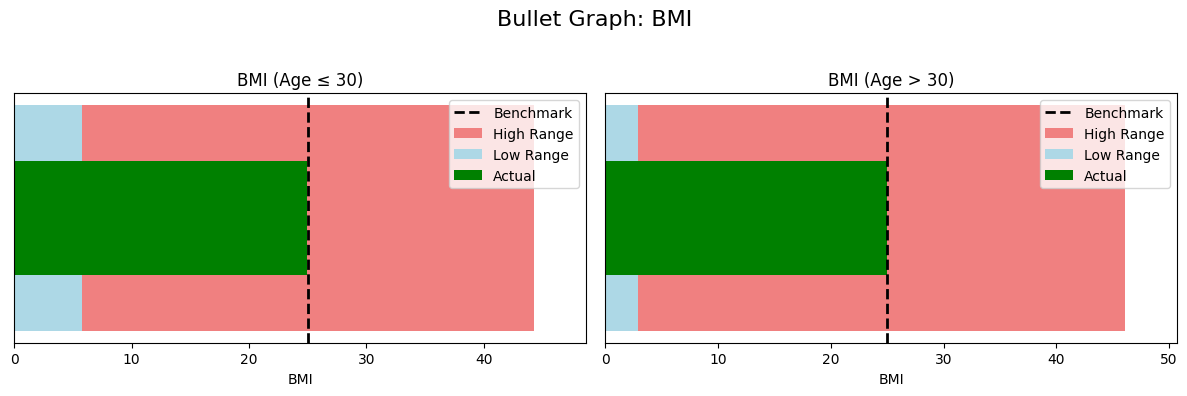

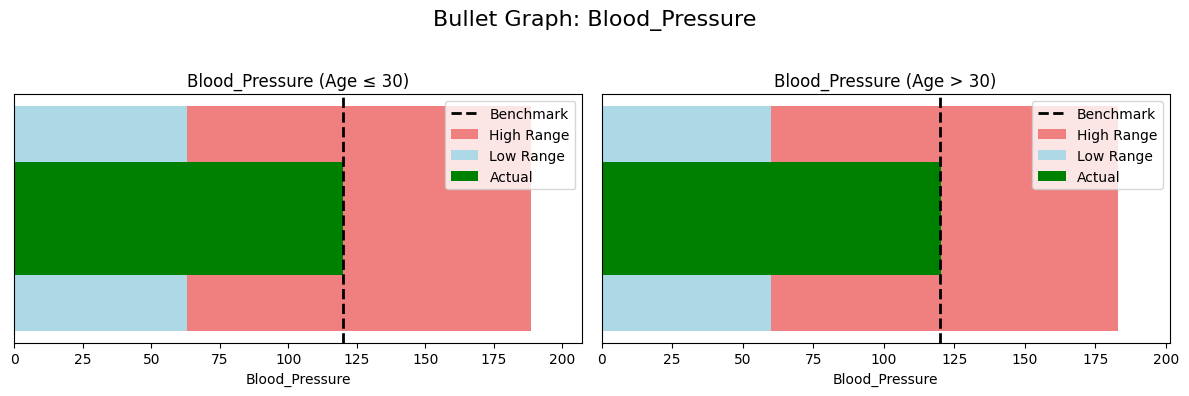

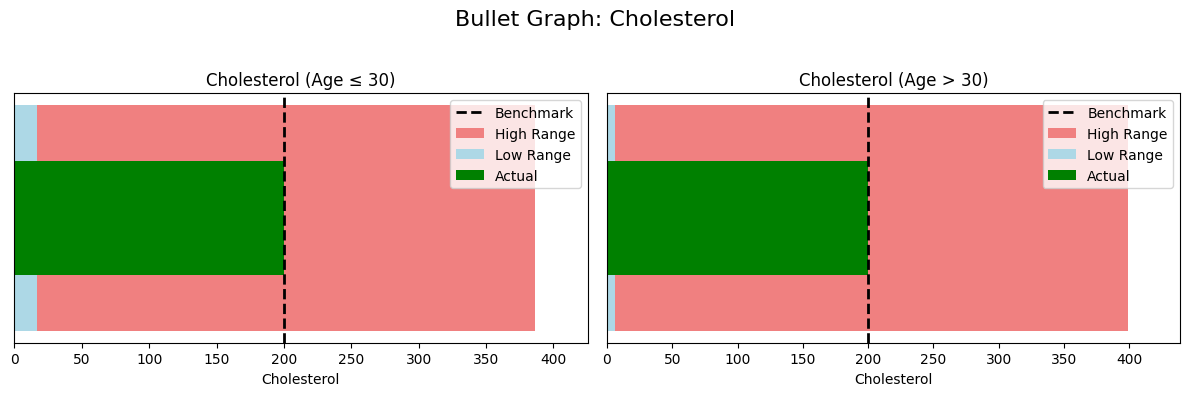

In [ ]:
# Bullet Graph

# Define age groups
age_below_or_equal_30 = df_new[df_new['Age'] <= 30]
age_above_30 = df_new[df_new['Age'] > 30]

# List of metrics to plot
metrics = ['Heart_Rate', 'BMI', 'Blood_Pressure', 'Cholesterol']

# Benchmarks for each metric
benchmarks = {
    'Heart_Rate': 80,  # Example benchmark in bpm
    'BMI': 25,  # Example benchmark for BMI
    'Blood_Pressure': 120,  # Example benchmark for blood pressure
    'Cholesterol': 200  # Example benchmark for cholesterol
}

# Create subplots for side-by-side comparison
for metric in metrics:
    if metric in df_new.columns:
        # Calculate values for age ≤ 30
        avg_below_30 = age_below_or_equal_30[metric].mean()
        low_below_30 = age_below_or_equal_30[metric].min()
        high_below_30 = age_below_or_equal_30[metric].max()

        # Calculate values for age > 30
        avg_above_30 = age_above_30[metric].mean()
        low_above_30 = age_above_30[metric].min()
        high_above_30 = age_above_30[metric].max()

        # Create the figure and subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

        # Plot for Age ≤ 30
        axes[0].barh(y=0, width=high_below_30, height=0.8, color='lightcoral', label='High Range')
        axes[0].barh(y=0, width=low_below_30, height=0.8, color='lightblue', label='Low Range')
        axes[0].axvline(x=benchmarks[metric], color='black', linewidth=2, linestyle='--', label='Benchmark')
        axes[0].barh(y=0, width=avg_below_30, height=0.4, color='green', label='Actual')
        axes[0].set_xlim(0, max(high_below_30 * 1.1, benchmarks[metric] * 1.1))
        axes[0].set_title(f'{metric} (Age ≤ 30)')
        axes[0].set_xlabel(metric)
        axes[0].legend(loc='upper right')
        axes[0].get_yaxis().set_visible(False)

        # Plot for Age > 30
        axes[1].barh(y=0, width=high_above_30, height=0.8, color='lightcoral', label='High Range')
        axes[1].barh(y=0, width=low_above_30, height=0.8, color='lightblue', label='Low Range')
        axes[1].axvline(x=benchmarks[metric], color='black', linewidth=2, linestyle='--', label='Benchmark')
        axes[1].barh(y=0, width=avg_above_30, height=0.4, color='green', label='Actual')
        axes[1].set_xlim(0, max(high_above_30 * 1.1, benchmarks[metric] * 1.1))
        axes[1].set_title(f'{metric} (Age > 30)')
        axes[1].set_xlabel(metric)
        axes[1].legend(loc='upper right')
        axes[1].get_yaxis().set_visible(False)

        # Adjust layout and display
        fig.suptitle(f'Bullet Graph: {metric}', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

C:\Users\law_b\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\law_b\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



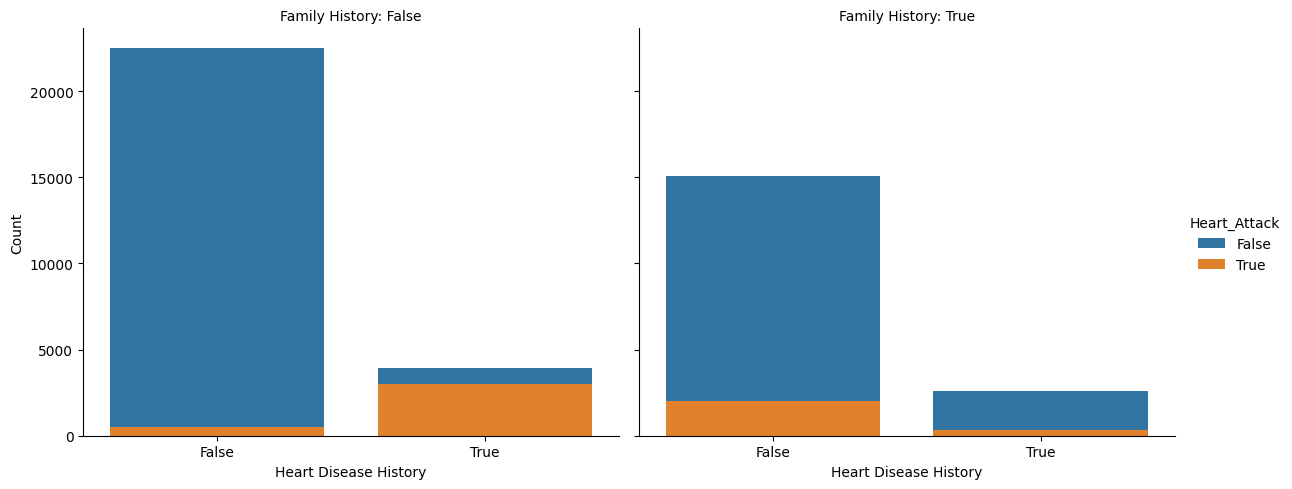

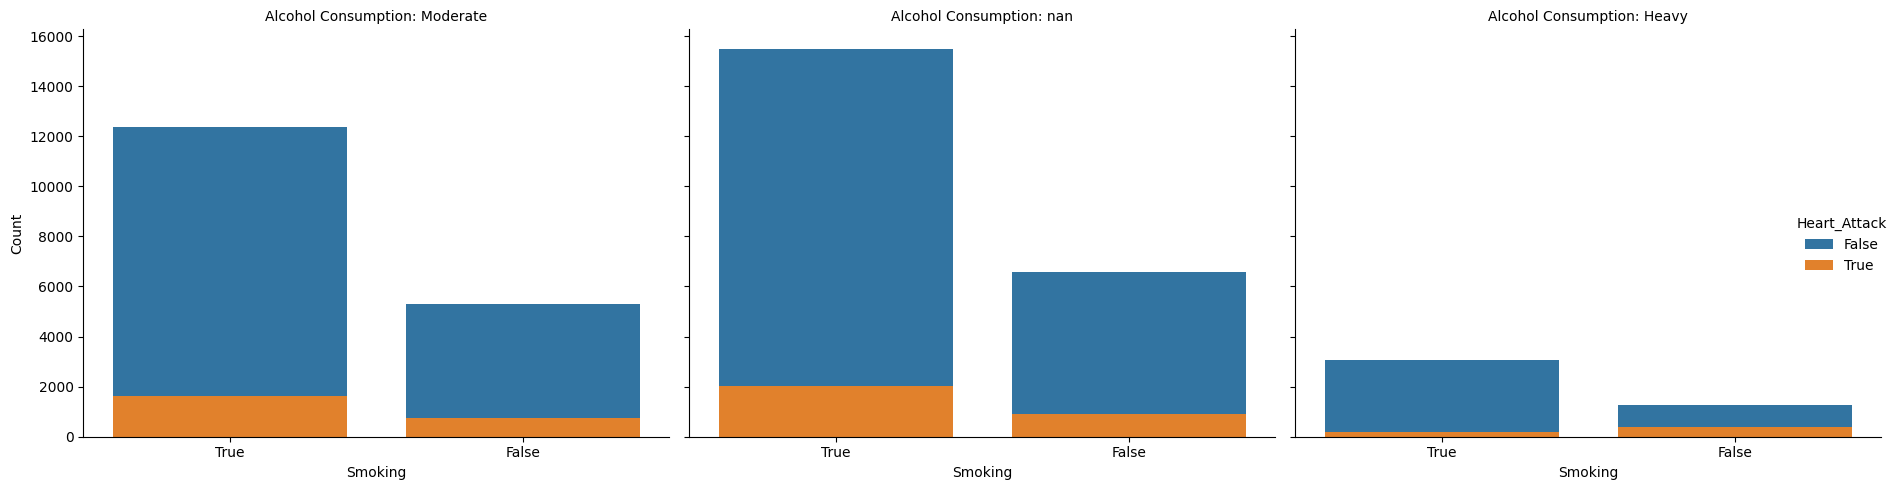

In [ ]:
#FacetGrid plot

# Plot 1: FacetGrid for Family History vs Heart Disease History
g1 = sns.FacetGrid(df_new, col="Family_History", hue="Heart_Attack", height=5, aspect=1.2)
g1.map(sns.countplot, 'Heart_Disease_History')
g1.set_axis_labels('Heart Disease History', 'Count')
g1.set_titles("Family History: {col_name}")
g1.add_legend()

# Plot 2: FacetGrid for Alcohol Consumption vs Smoking
g2 = sns.FacetGrid(df_new, col="Alcohol_Consumption", hue="Heart_Attack", height=5, aspect=1.2)
g2.map(sns.countplot, 'Smoking')
g2.set_axis_labels('Smoking', 'Count')
g2.set_titles("Alcohol Consumption: {col_name}")
g2.add_legend()

plt.tight_layout()
plt.show()


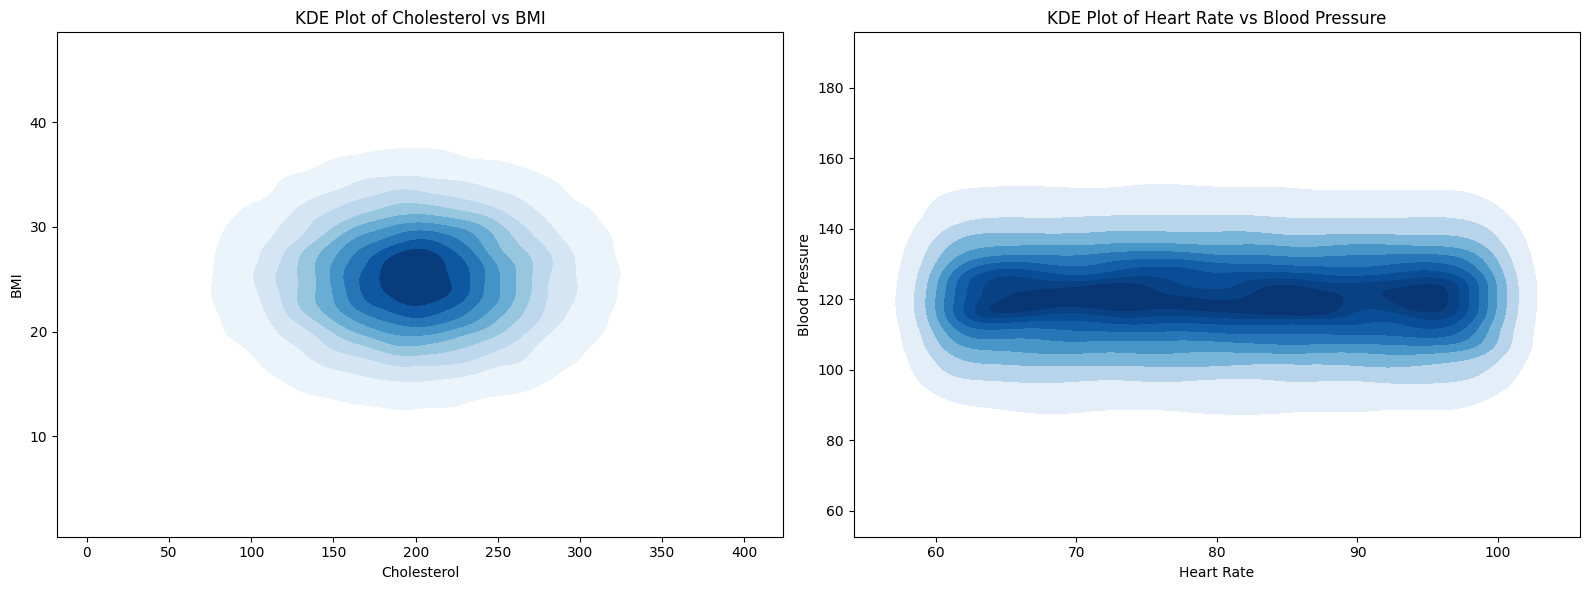

In [ ]:
# KDE plot

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE Plot for Cholesterol vs BMI
sns.kdeplot(data=df_new, x='Cholesterol', y='BMI', cmap="Blues", fill=True, ax=axes[0])
axes[0].set_xlabel("Cholesterol")
axes[0].set_ylabel("BMI")
axes[0].set_title("KDE Plot of Cholesterol vs BMI")

# KDE Plot for Heart Rate vs Blood Pressure
sns.kdeplot(data=df_new, x='Heart_Rate', y='Blood_Pressure', cmap='Blues', fill=True, ax=axes[1])
axes[1].set_xlabel("Heart Rate")
axes[1].set_ylabel("Blood Pressure")
axes[1].set_title("KDE Plot of Heart Rate vs Blood Pressure")

plt.tight_layout()
plt.show()


In [ ]:
# Line plot

if 'Age' in df_new.columns and 'Stress_Level' in df_new.columns and 'Mental_Health' in df_new.columns and 'Sleep_Hours' in df_new.columns:
    # Group the ages into bins (e.g., 10-20, 20-30, etc.)
    df_new['Age_Group'] = pd.cut(df_new['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80],
                                 labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

    # Grouping by the Age_Group and calculating the average stress level for each group
    avg_stress_by_age_group = df_new.groupby('Age_Group')['Stress_Level'].mean().reset_index()

    # Grouping by the Age_Group and calculating the average mental health for each group
    avg_mental_by_age_group = df_new.groupby('Age_Group')['Mental_Health'].mean().reset_index()

    # Grouping by the Age_Group and calculating the average sleep hours for each group
    avg_sleep_by_age_group = df_new.groupby('Age_Group')['Sleep_Hours'].mean().reset_index()

    # Create subplots for stress level, mental health, and sleep hours
    fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

    # Plot average stress level vs age group
    sns.lineplot(data=avg_stress_by_age_group, x='Age_Group', y='Stress_Level', marker='o', color='b', ax=axes[0])
    axes[0].set_title('Average Stress Level vs Age Group')
    axes[0].set_ylabel('Average Stress Level')
    axes[0].grid(True)

    # Plot average mental health vs age group
    sns.lineplot(data=avg_mental_by_age_group, x='Age_Group', y='Mental_Health', marker='o', color='g', ax=axes[1])
    axes[1].set_title('Average Mental Health vs Age Group')
    axes[1].set_ylabel('Average Mental Health')
    axes[1].grid(True)

    # Plot average sleep hours vs age group
    sns.lineplot(data=avg_sleep_by_age_group, x='Age_Group', y='Sleep_Hours', marker='o', color='r', ax=axes[2])
    axes[2].set_title('Average Sleep Hours vs Age Group')
    axes[2].set_xlabel('Age Group')
    axes[2].set_ylabel('Average Sleep Hours')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("The required columns ('Age', 'Stress_Level', 'Mental_Health', 'Sleep_Hours') are not found in the DataFrame.")


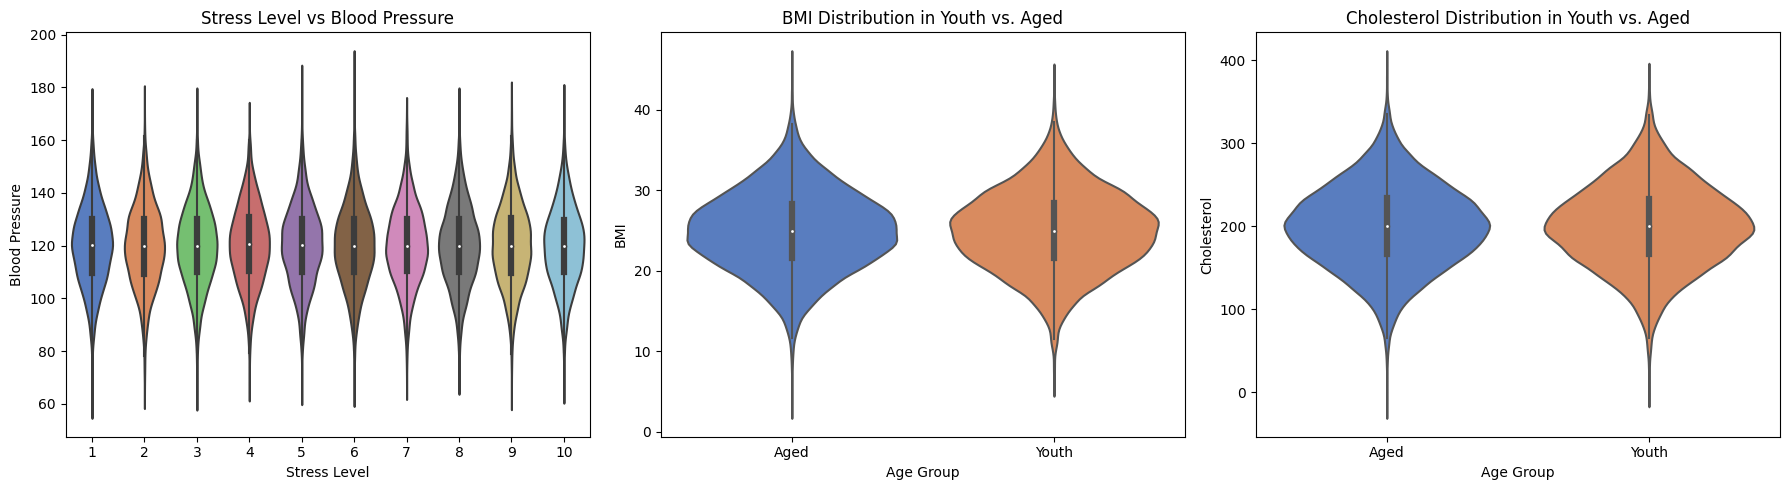

In [ ]:
#Violin plot

# Create 'Age_Group' column
df["Age_Group"] = df["Age"].apply(lambda x: "Youth" if x < 30 else "Aged")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Violin Plot: Sleep_Hours vs. Stress_Level
sns.violinplot(x="Stress_Level", y="Blood_Pressure", data=df, ax=axes[0], palette="muted")
axes[0].set_title("Stress Level vs Blood Pressure")
axes[0].set_xlabel("Stress Level")
axes[0].set_ylabel("Blood Pressure")

# Violin Plot: Age_Group vs. BMI
sns.violinplot(x="Age_Group", y="BMI", data=df, palette="muted", ax=axes[1])
axes[1].set_title("BMI Distribution in Youth vs. Aged")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("BMI")

# Violin Plot: Age_Group vs. Cholesterol
sns.violinplot(x="Age_Group", y="Cholesterol", data=df, palette="muted", ax=axes[2])
axes[2].set_title("Cholesterol Distribution in Youth vs. Aged")
axes[2].set_xlabel("Age Group")
axes[2].set_ylabel("Cholesterol")


plt.tight_layout()
plt.show()

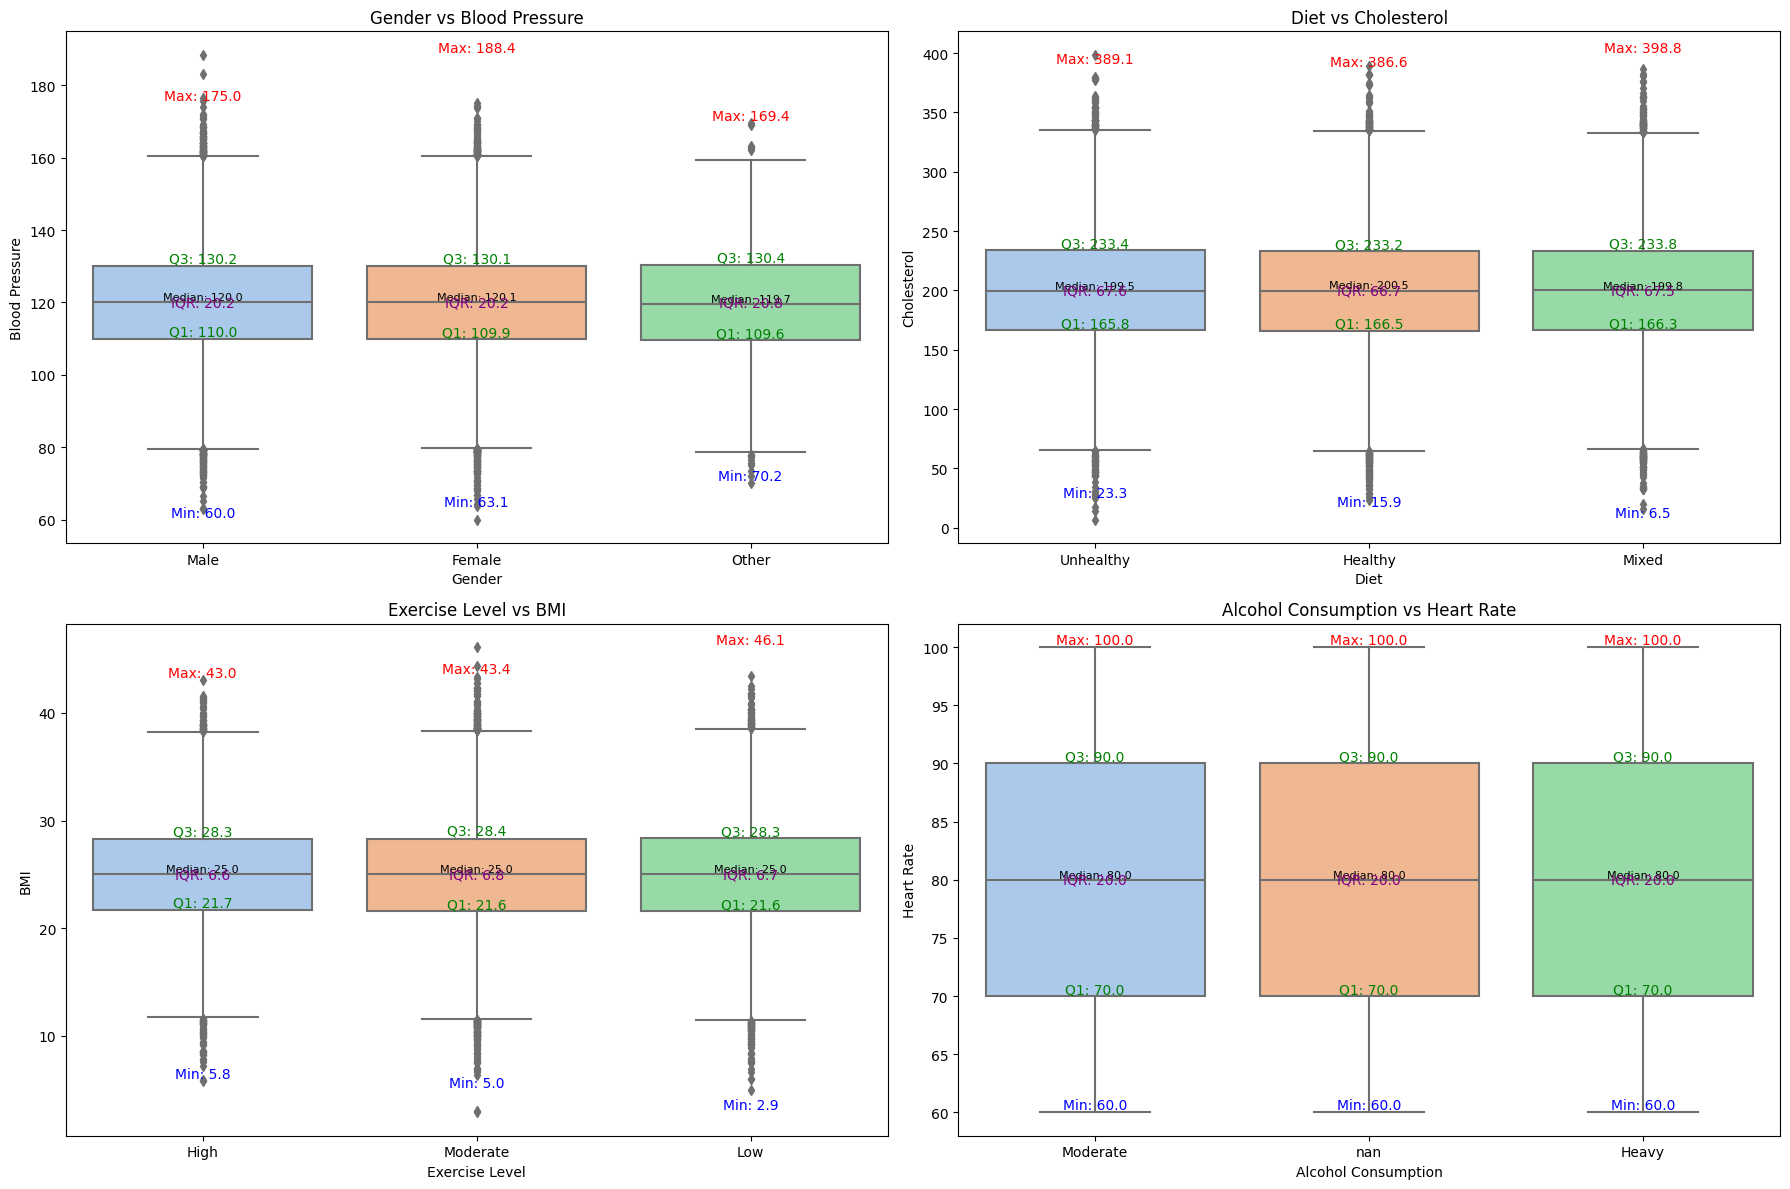

In [ ]:
# Box plot

# Function to annotate quartiles, IQR, min, max, and median inside the plot
def annotate_boxplot(ax, data, group_col, value_col):
    # Calculate the statistics for each group
    group_stats = data.groupby(group_col)[value_col].describe()

    for i, group in enumerate(group_stats.index):
        min_val = group_stats.loc[group, 'min']
        q1 = group_stats.loc[group, '25%']
        median = group_stats.loc[group, '50%']
        q3 = group_stats.loc[group, '75%']
        max_val = group_stats.loc[group, 'max']
        iqr = q3 - q1

        # Adding text annotations for min, Q1, median, Q3, max, and IQR
        ax.text(i, min_val, f"Min: {min_val:.1f}", ha='center', va='bottom', fontsize=10, color='blue')
        ax.text(i, q1, f"Q1: {q1:.1f}", ha='center', va='bottom', fontsize=10, color='green')
        ax.text(i, median, f"Median: {median:.1f}", ha='center', va='bottom', fontsize=8, color='black')
        ax.text(i, q3, f"Q3: {q3:.1f}", ha='center', va='bottom', fontsize=10, color='green')
        ax.text(i, max_val, f"Max: {max_val:.1f}", ha='center', va='bottom', fontsize=10, color='red')
        ax.text(i, (q1 + q3) / 2, f"IQR: {iqr:.1f}", ha='center', va='center', fontsize=10, color='purple')

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gender vs Blood Pressure
ax1 = sns.boxplot(x='Gender', y='Blood_Pressure', data=df_new, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Gender vs Blood Pressure')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Blood Pressure')
annotate_boxplot(ax1, df_new, 'Gender', 'Blood_Pressure')

# Diet vs Cholesterol
ax2 = sns.boxplot(x='Diet', y='Cholesterol', data=df_new, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Diet vs Cholesterol')
axes[0, 1].set_xlabel('Diet')
axes[0, 1].set_ylabel('Cholesterol')
annotate_boxplot(ax2, df_new, 'Diet', 'Cholesterol')

# Exercise vs BMI
ax3 = sns.boxplot(x='Exercise_Level', y='BMI', data=df_new, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Exercise Level vs BMI')
axes[1, 0].set_xlabel('Exercise Level')
axes[1, 0].set_ylabel('BMI')
annotate_boxplot(ax3, df_new, 'Exercise_Level', 'BMI')

# Alcohol Consumption vs Heart Rate
ax4 = sns.boxplot(x='Alcohol_Consumption', y='Heart_Rate', data=df_new, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Alcohol Consumption vs Heart Rate')
axes[1, 1].set_xlabel('Alcohol Consumption')
axes[1, 1].set_ylabel('Heart Rate')
annotate_boxplot(ax4, df_new, 'Alcohol_Consumption', 'Heart_Rate')

plt.tight_layout()
plt.show()


In [ ]:
# t-SNE, PCA, UMAP high dimension visualization

# Ensure dataset has relevant features
features = ['Age', 'Heart_Rate', 'BMI', 'Blood_Pressure', 'Cholesterol']
df_clustering = df_new[features].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(data_scaled)

# Dimensionality Reduction Methods
# 1. t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)
df_clustering['t-SNE_1'] = data_tsne[:, 0]
df_clustering['t-SNE_2'] = data_tsne[:, 1]

# 2. UMAP
umap = UMAP(n_components=2, random_state=42)
data_umap = umap.fit_transform(data_scaled)
df_clustering['UMAP_1'] = data_umap[:, 0]
df_clustering['UMAP_2'] = data_umap[:, 1]

# 3. PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df_clustering['PCA_1'] = data_pca[:, 0]
df_clustering['PCA_2'] = data_pca[:, 1]

# Plot the visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# t-SNE Plot
sns.scatterplot(
    ax=axes[0],
    x='t-SNE_1', y='t-SNE_2',
    hue='Cluster',
    palette='viridis',
    data=df_clustering,
    legend='full'
)
axes[0].set_title('t-SNE Visualization')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

# UMAP Plot
sns.scatterplot(
    ax=axes[1],
    x='UMAP_1', y='UMAP_2',
    hue='Cluster',
    palette='viridis',
    data=df_clustering,
    legend='full'
)
axes[1].set_title('UMAP Visualization')
axes[1].set_xlabel('UMAP Component 1')
axes[1].set_ylabel('UMAP Component 2')

# PCA Plot
sns.scatterplot(
    ax=axes[2],
    x='PCA_1', y='PCA_2',
    hue='Cluster',
    palette='viridis',
    data=df_clustering,
    legend='full'
)
axes[2].set_title('PCA Visualization')
axes[2].set_xlabel('PCA Component 1')
axes[2].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


C:\Users\law_b\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\law_b\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
# Sunburst Chart

# Example hierarchical data preparation
df_new = df_new.groupby(['Gender', 'Diet', 'Exercise_Level']).size().reset_index(name='Count')

# Create the sunburst chart
fig = px.sunburst(df_new,
                  path=['Gender', 'Diet', 'Exercise_Level'],
                  values='Count',
                  title="Sunburst Chart: Gender, Diet, and Exercise Level Distribution")

fig.show()


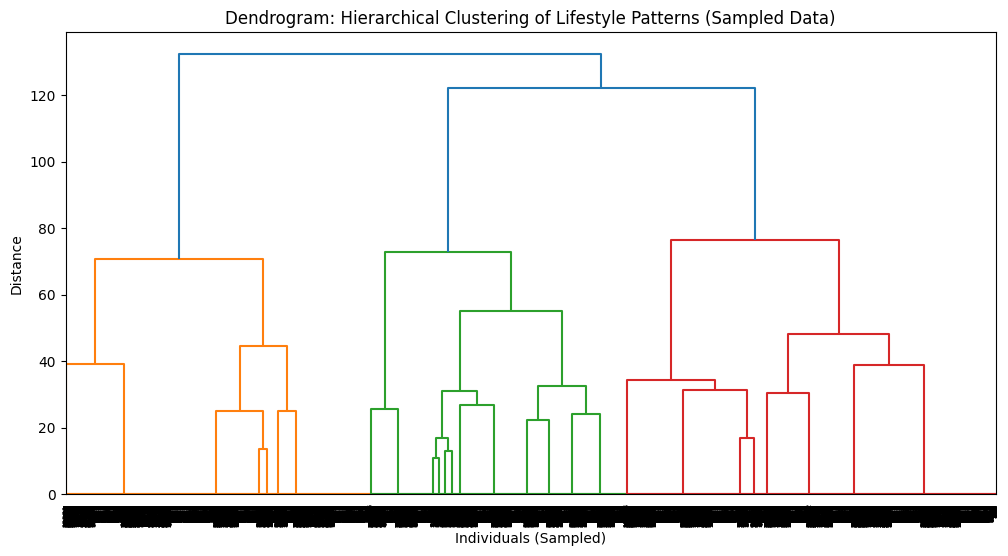

In [ ]:
# Heirarchical Dendogram

# Copying df_new to avoid modifying the original data
df_cluster = df_new.copy()

# Encoding categorical variables numerically
label_encoders = {}
for col in ["Diet", "Exercise_Level", "Alcohol_Consumption"]:  # Modify as needed
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col])
    label_encoders[col] = le  # Store for reference

# Selecting only numerical columns for clustering
features = ["Diet", "Exercise_Level", "Alcohol_Consumption"]  # Use more features if needed

# Sample 200 rows randomly (adjust as needed)
df_sample = df_cluster.sample(n=20000, random_state=42)  # Change '200' as needed

# Extracting features from the sampled dataset
X = df_sample[features]

# Computing the linkage matrix (using Ward’s method)
linkage_matrix = sch.linkage(X, method="ward")

# Plotting the Dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, orientation="top", distance_sort="ascending", show_leaf_counts=True)
plt.title("Dendrogram: Hierarchical Clustering of Lifestyle Patterns (Sampled Data)")
plt.xlabel("Individuals (Sampled)")
plt.ylabel("Distance")
plt.show()


In [ ]:
# Waterfall chart

# Aggregating the count of individuals for different categories
total_count = df_new.shape[0]  # Total individuals in dataset
healthy_count = df_new[df_new["Diet"] == "Healthy"].shape[0]
unhealthy_count = df_new[df_new["Diet"] == "Unhealthy"].shape[0]
mixed_count = df_new[df_new["Diet"] == "Mixed"].shape[0]

moderate_exercise = df_new[df_new["Exercise_Level"] == "Moderate"].shape[0]
low_exercise = df_new[df_new["Exercise_Level"] == "Low"].shape[0]
high_exercise = df_new[df_new["Exercise_Level"] == "High"].shape[0]

alcohol_heavy_consumers = df_new[df_new["Alcohol_Consumption"] == "Heavy"].shape[0]
alcohol_moderate_consumers = df_new[df_new["Alcohol_Consumption"] == "Moderate"].shape[0]
alcohol_none_consumers = df_new[df_new["Alcohol_Consumption"] == "None"].shape[0]

# Ensuring Alcohol None Consumers is visible (adjusting to relative contribution)
non_alcohol_adjusted = total_count - (alcohol_heavy_consumers + alcohol_moderate_consumers)

# Creating Waterfall Chart
fig = go.Figure(go.Waterfall(
    name="Population Breakdown",
    orientation="v",
    measure=["absolute"] + ["relative"] * 9,  # First value absolute, rest relative
    x=[
        "Total Population", "Healthy Diet", "Unhealthy Diet", "Mixed Diet",
        "Moderate Exercise", "Low Exercise", "High Exercise",
        "Alcohol Heavy Consumers", "Alcohol Moderate Consumers", "Alcohol None Consumers"
    ],
    y=[
        total_count, healthy_count, unhealthy_count, mixed_count,
        moderate_exercise, low_exercise, high_exercise,
        alcohol_heavy_consumers, alcohol_moderate_consumers, non_alcohol_adjusted  # Adjusted value
    ],
    text=[f"{v}" for v in [
        total_count, healthy_count, unhealthy_count, mixed_count,
        moderate_exercise, low_exercise, high_exercise,
        alcohol_heavy_consumers, alcohol_moderate_consumers, non_alcohol_adjusted
    ]],
    textposition="outside",
    connector={"line": {"color": "rgb(63, 63, 63)"}}
))

fig.update_layout(
    title="Waterfall Chart: Breakdown of Population by Lifestyle Factors",
    xaxis_title="Factors",
    yaxis_title="Number of Individuals",
    showlegend=False
)

fig.show()

In [ ]:
# Parallel Coordinates plot

# Prepare the dataset (ensuring categorical features are present)
df_parallel = df_new[['Gender', 'Diet', 'Exercise_Level', 'Heart_Disease_History','Heart_Attack']]

# Create Parallel Categories Plot
fig = px.parallel_categories(df_parallel,
                             dimensions=['Gender', 'Diet', 'Exercise_Level', 'Heart_Disease_History','Heart_Attack'],
                             color=df_new['Heart_Disease_History'].astype('category').cat.codes,
                             color_continuous_scale=px.colors.sequential.Viridis,
                             title="Parallel Categories: Gender, Diet, Exercise, Heart_Disease_History and Heart_Attack")

fig.show()